In [1]:
# Import all the functions you need
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from pathlib import Path
import platform

# Comment here to add in for either mac or linux computer
if platform.system() == 'Linux': # for linux
    sys.path.extend(['/data/GitHub/NeuroPy']) 
    sys.path.extend(['/data/GitHub/TraceFC/'])
elif platform.system() == 'Darwin':
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy'])
    sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/TraceFC'])
elif platform.system() == 'Windows':
    pass

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.neuroscopeio import NeuroscopeIO
from neuropy.io.binarysignalio import BinarysignalIO 
from neuropy.io.miniscopeio import MiniscopeIO
from neuropy.core import Epoch
from neuropy.utils import plot_util
from neuropy.plotting.spikes import plot_raster
from neuropy.plotting.signals import plot_signal_w_epochs
from neuropy.plotting.spikes import plot_binned_raster

## Import USV data from DeepSqueak
First, you need to run `Calls2python.m` to convert your DeepSqueak .mat file to something readable by Python

In [5]:
import neuropy.io.usvio as usvio
base_dir = Path('/data2/Trace_FC/Recording_Rats/Han/2022_08_03_training/2_training/USVdetections')
ds = usvio.DeepSqueakIO(base_dir / 'T0000001 2023-10-04 2_59 PM.mat')  # Load in calls

OSError: Reader needs file name or open file-like object

In [4]:
# Display calls in pandas format
ds.usv_df

,Begin_Time,Freq_Min,Duration,Freq_Range,Score,Accept
0,37.700836,39.500,0.01,10.500,0.582072,0
1,39.320836,39.500,0.02,10.500,0.582072,0
2,39.350836,39.500,0.13,10.500,0.582072,0
3,39.500836,39.500,0.01,10.500,0.582072,0
4,39.530836,39.500,0.01,10.500,0.582072,0
...,...,...,...,...,...,...
181,1785.840296,39.875,0.01,8.125,0.570376,0
182,1785.930296,39.875,0.02,8.125,0.570376,0
183,1786.230296,39.875,0.04,8.125,0.570376,0
184,1790.127632,39.875,0.07,8.000,0.516081,0


In [7]:
# Example code to exclude every call that last less than 0.1 second
ds.usv_df[ds.usv_df['Duration'] > 0.1]

,Begin_Time,Freq_Min,Duration,Freq_Range,Score,Accept
2,39.350836,39.500,0.130000,10.500000,0.582072,0
12,41.350836,39.500,0.190000,10.500000,0.582072,0
20,67.820836,39.500,0.210000,10.500000,0.582072,0
21,71.950836,39.500,0.120000,10.500000,0.582072,0
24,268.755447,8.000,0.239722,17.372126,0.561400,0
...,...,...,...,...,...,...
168,1772.569100,17.750,0.350000,32.125000,0.576606,0
172,1774.856784,39.750,0.120000,8.250000,0.583206,0
175,1775.426784,39.750,0.150000,8.250000,0.583206,0
178,1781.150296,39.875,0.240000,8.125000,0.570376,0


In [12]:
# Only keep accepted calls
usv_accept_df = ds.usv_df[ds.usv_df['Accept'] == 1]
usv_accept_df.sample(5)

,Begin_Time,Freq_Min,Duration,Freq_Range,Score,Accept
35,447.759281,39.515805,0.128960,14.143678,0.555688,1
55,472.530338,18.000000,1.094482,43.346264,0.565746,1
50,464.785183,26.294540,0.408357,41.816092,1.000000,1
135,1250.922672,14.875000,0.580000,35.125000,0.576714,1
37,449.350060,27.524425,0.180000,22.600575,0.555688,1


## Plots to get started with

array([[<Axes: title={'center': 'Duration'}>]], dtype=object)

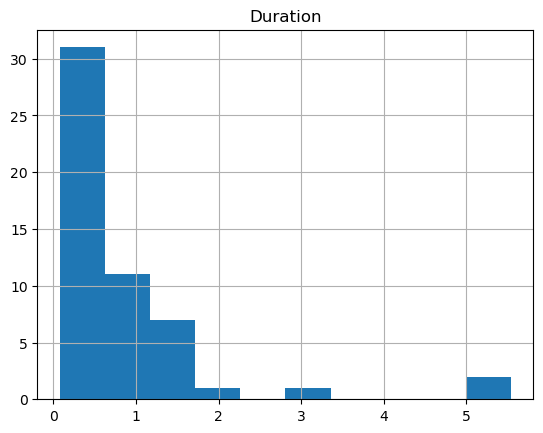

In [19]:
# Plot histogram of call durations
usv_accept_df.hist(column='Duration')

array([[<Axes: title={'center': 'Freq_Min'}>]], dtype=object)

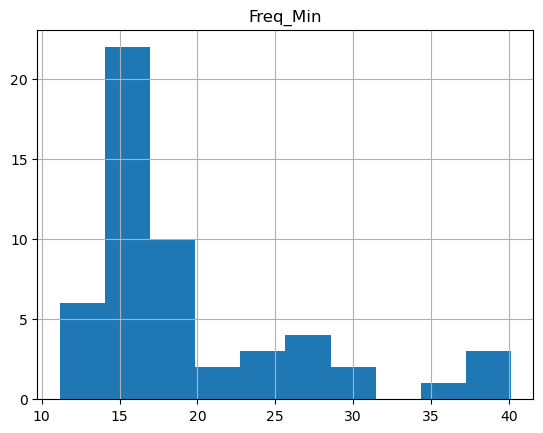

In [20]:
# Plot histogram of call min and max frequencies
usv_accept_df.hist(column='Freq_Min')

<Axes: xlabel='Begin_Time', ylabel='Freq_Min'>

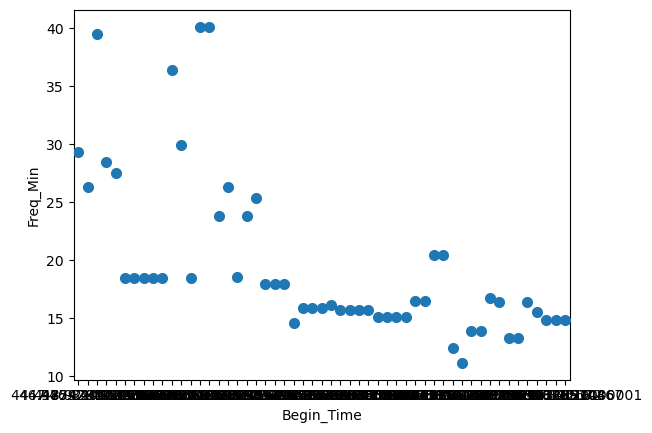

In [58]:
sns.stripplot(x=usv_accept_df.Begin_Time,y=usv_accept_df.Freq_Min,jitter=0,size=8)

<Axes: xlabel='Begin_Time', ylabel='Duration'>

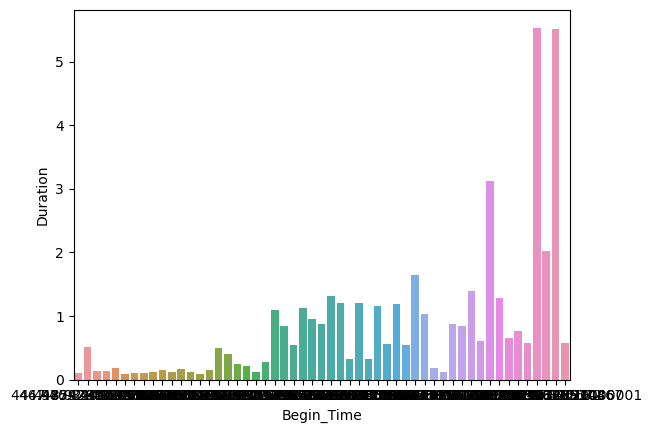

In [57]:
sns.barplot(x=usv_accept_df.Begin_Time,y=usv_accept_df.Duration, data=usv_accept_df)

<Axes: xlabel='Begin_Time'>

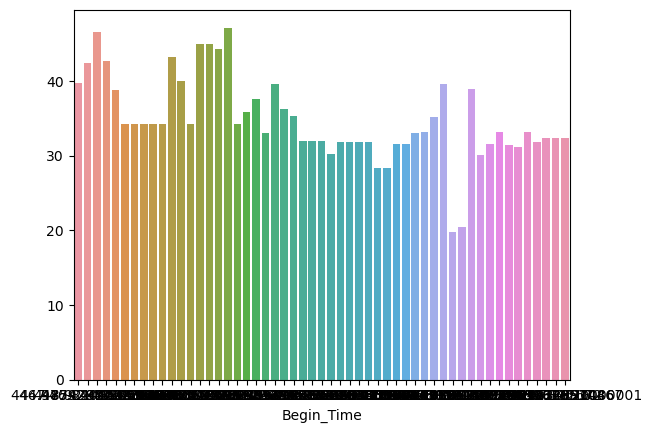

In [71]:
sns.barplot(x=usv_accept_df.Begin_Time,y=usv_accept_df.Freq_Min+0.5*(usv_accept_df.Freq_Range),data=usv_accept_df)

In [74]:
# Should insert median frequency
usv_accept_df.insert(4, "Median Freq", usv_accept_df.Freq_Min+0.5*(usv_accept_df.Freq_Range))
# usv_accept_df

ValueError: cannot insert Median Freq, already exists

<Axes: xlabel='Begin_Time', ylabel='Median Freq'>

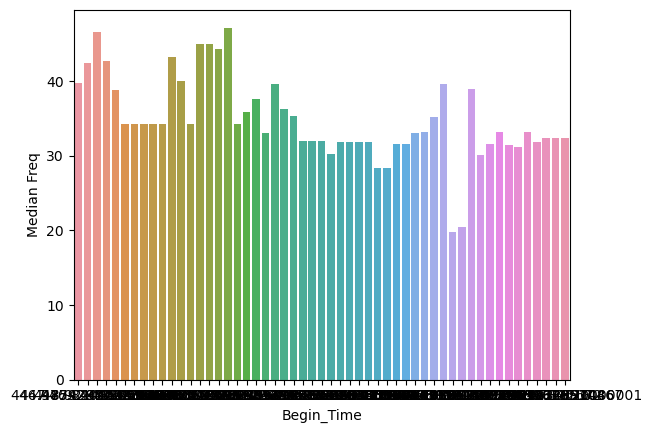

In [76]:
sns.barplot(x='Begin_Time',y="Median Freq",data=usv_accept_df)